<a href="https://colab.research.google.com/github/jethompson023/CS-491/blob/main/CS491Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
from tensorflow.python.keras import models 
from tensorflow.python.keras import layers 
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

1) Create a Neural Network (NN) with three hidden layers. Train it on the data from the training set. Then find the class of each element in the testing set using the NN. What is your accuracy, that is, what percent of samples in the testing set were classified correctly?

In [ ]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['category'] = iris.target

In [ ]:
training_data = iris['data'][:120, :]
testing_data = iris['data'][120:, :]
train_labels = iris['target'][:120]
test_labels = iris['target'][120:]

In [ ]:
x_training = np.asarray(training_data)
x_testing = np.asarray(testing_data)

y_training = np.asarray(train_labels)
y_testing = np.asarray(test_labels)

In [ ]:
#Setup the Model no the rwe set the bounds for training
model = MLPClassifier(hidden_layer_sizes = ((3, 3, 3)), random_state=54 )
model.fit(x_training, y_training)
results = model.predict(x_testing)

def checkSame(a, b):
  if a == b: 
    return 1
  return 0

accuracy = np.vectorize(checkSame)(results, y_testing)
accuratePredict = np.count_nonzero(accuracy)
accuratePercent = accuratePredict / y_testing.shape[0] * 100
print("Percent accuracy for testing set: ")
print(accuratePercent)

Percent accuracy for testing set: 
86.66666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


2) Use the iris set again, but this time use the whole set (do not split it into training and testing set). Use the sklearn KMeans library and k=3 to cluster the 150 samples into three sets. Compute the following parameters.

True Negatives:		[100  86  98]
False Positives:	 [ 0 14  2]
False Negative:	[ 0  2 14]
True Positives: 		[50 48 36]
Percision: 		[1.         0.77419355 0.94736842]
Recall:			[1.   0.96 0.72]
F1 Score: 		[1.         0.85714286 0.81818182]


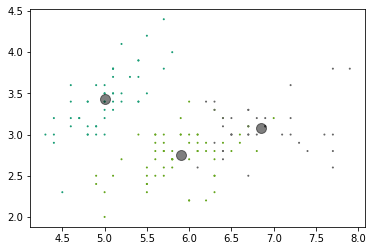

In [ ]:
X = iris_data
Y = iris_target

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
predict = kmeans.predict(X)

matrix = confusion_matrix(Y, predict)

falsePost = matrix.sum(axis = 0) - np.diag(matrix)
falseNeg = matrix.sum(axis = 1) - np.diag(matrix)
truePost = np.diag(matrix)
trueNeg = matrix.sum() - (falsePost + falseNeg + truePost)

print("True Negatives:\t\t" + str(trueNeg) + "\n"
      "False Positives:\t " + str(falsePost) + "\n"
      "False Negative:\t" + str(falseNeg) + "\n"
      "True Positives: \t\t" + str(truePost))
precision = truePost / (truePost + falsePost)
recall = truePost / (truePost + falseNeg)
fiScore = 2 * (precision * recall) / (precision + recall)

print("Percision: \t\t" + str(precision))
print("Recall:\t\t\t" + str(recall))
print("F1 Score: \t\t" + str(fiScore))

centers = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], s=1, c = predict, cmap= 'Dark2')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha = 0.5)